In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}  # Creates empty dictionary called 'sequence_data_dict'
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

# Function ```get_sequences_from_file```
### Description
```
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} 
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
```
Creates an empty dictionary and fills it with with 'species_name' as the key and the corresponding sequence as the value
### Parameters
* `fasta_fn`: name of FASTA file

### Variables
* `sequence_data_dict`: creates
* `description`: split metadata line
* `species_name`: The second and third values in the description, with a space in between

### Return
prints a dictionary of species name keys and sequence values


In [3]:
get_sequences_from_file('penguins_cytb.fasta')

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

In [4]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    # for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
    aa_strings = []
    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = "".join(string_nucleotides[i:i+3])
        if (i + 3 >= len(string_nucleotides)):
            if (codon == "TAA" or codon == "TAG" or codon == "TGA"):
                break
        # Add the aa to the aa_strings.
        aa_strings.append(mito_table.forward_table[codon])
    # Collapse the list.
    aa_seq_string = "".join(aa_strings)
    return(aa_seq_string)

In [5]:
translate_function(get_sequences_from_file('penguins_cytb.fasta')['Aptenodytes forsteri'])

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

# Function ```translate_function```
### Description
Gives amino acid sequence for a given nucleotide sequence
### Parameters
* `string_nucleotides`: name of FASTA file
### Variables
* `codon`: 3 sequential nucleotides; each set of 3 are joined together
* `aa_strings`: list of amino acids from a nucleotide sequence. Starts out empty and gets appended as codons are translated
* `aa_seq_string`: Joined aa_strings

### Return
Returns an amino acid sequence for the given sequence


In [78]:
def translate_function_alternative(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = str(Seq.translate(string_nucleotides, mito_table))[:-1]
    return(aa_seq_string)

In [79]:
print(translate_function_alternative(get_sequences_from_file('penguins_cytb.fasta')['Aptenodytes forsteri']))

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [83]:
def compute_MW(aa_seq):
    return(ProteinAnalysis(aa_seq).molecular_weight())

In [85]:
compute_MW(translate_function_alternative(get_sequences_from_file('penguins_cytb.fasta')['Aptenodytes forsteri']))

42459.602100000004

In [86]:
def GC_percent(string_nucleotides):
    high_bondage = string_nucleotides.count('G' and 'C')
    print(high_bondage)
    percent_GC = 100 * high_bondage/len(string_nucleotides)
    return(percent_GC)

In [87]:
GC_percent(get_sequences_from_file('penguins_cytb.fasta')['Aptenodytes forsteri'])

413


36.13298337707786

In [13]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [95]:
molecular_weights = []
gc_contents = []
for key, value in cytb_seqs.items():
    aa_seq = translate_function(value)
    molecular_weights.append(compute_MW(aa_seq))
    gc_contents.append(GC_percent(value))

penguins_df.update(pd.DataFrame({'molecular_weight': molecular_weights}))
penguins_df.update(pd.DataFrame({'GC_percentage': gc_contents}))

413
422
441
436
441
427
415
401
403
417
427
416


In [104]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
mass_df = pd.read_csv('penguins_mass_cytb.csv')

In [106]:
mass_df

,species,mass,molecular_weight,GC_percentage
0,Aptenodytes forsteri,28.00,42459.6021,36.132983
1,Aptenodytes patagonicus,13.40,42563.7067,36.920385
2,Eudyptes chrysocome,2.80,42475.5753,38.582677
3,Eudyptes chrysolophus,4.50,42445.5493,38.145232
4,Eudyptes sclateri,4.25,42475.5753,38.582677
5,Eudyptula minor,1.60,42491.6408,37.357830
6,Pygoscelis adeliae,4.60,42458.6140,36.307962
7,Pygoscelis antarctica,4.10,42404.5423,35.083115
8,Pygoscelis papua,6.10,42595.8759,35.258093
9,Spheniscus demersus,3.20,42431.5490,36.482940


In [107]:
plot_dims = (30, 9)

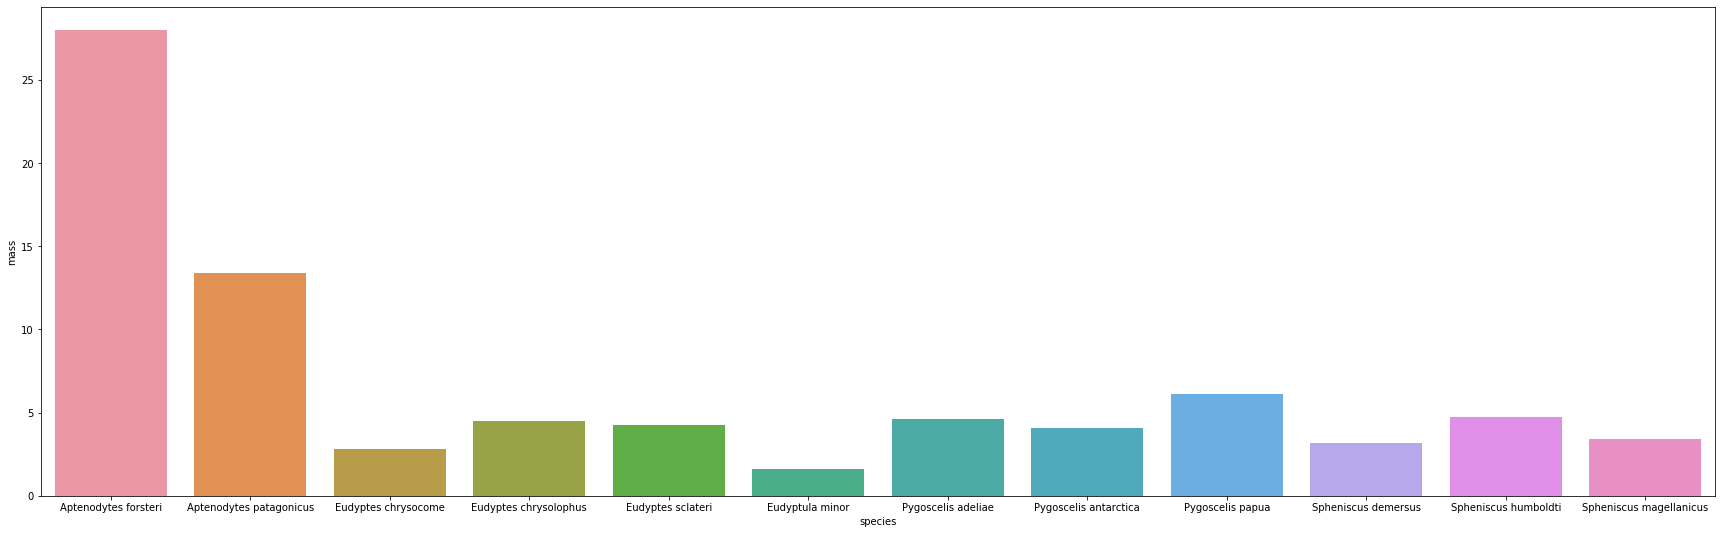

In [108]:
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x = 'species', y = 'mass', data = mass_df)

# Part 8 questions

* Eudyptula minor
* This is the smallest known species of penguin

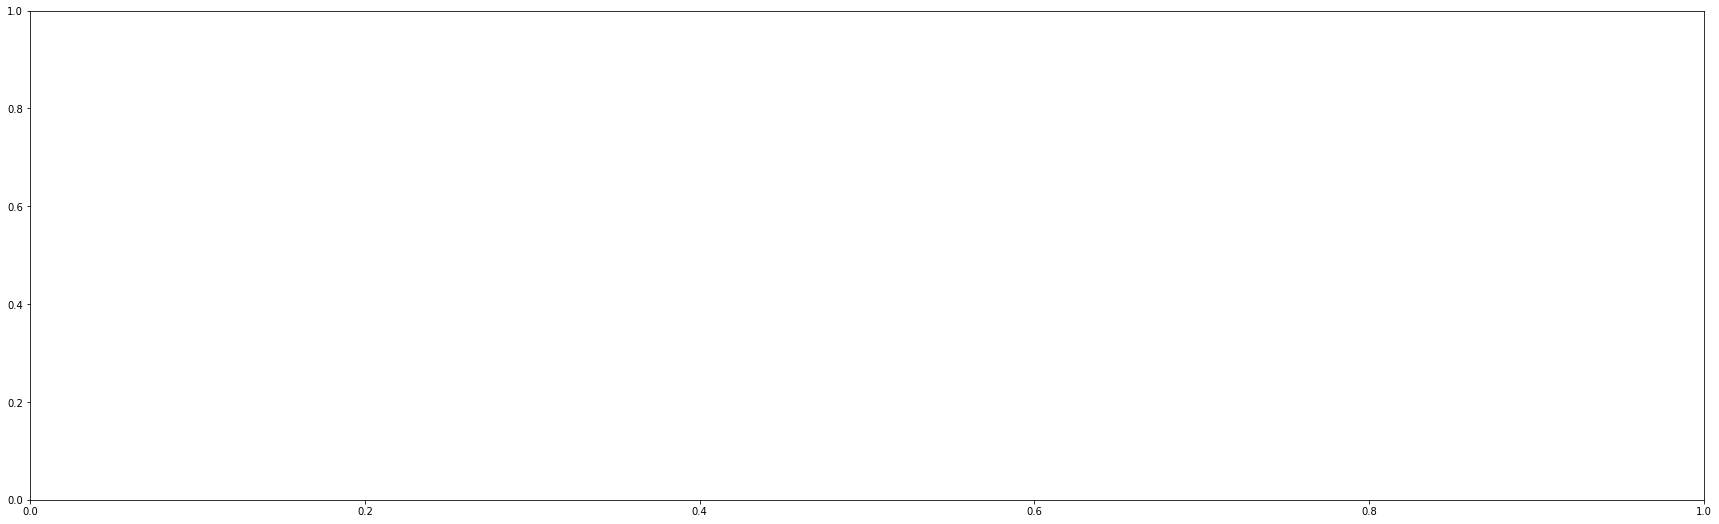

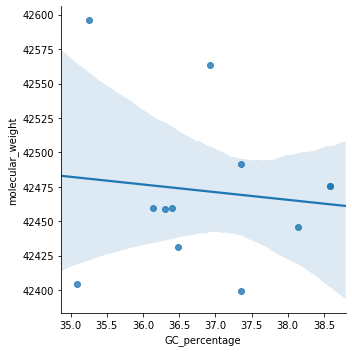

In [109]:
fig, ax = plt.subplots(figsize=plot_dims)
sns.lmplot('GC_percentage', 'molecular_weight', data = mass_df)